### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

In [1]:
from qiskit import * # import tudo do qiskit

In [2]:
# Determina o número de qubits e de cbits a serem utilizados
qr = QuantumRegister(2) # determina quantos qubits serão usados
cr = ClassicalRegister(2) # determina quantos cbits serão usados

# Constrói o circuito quântico
qc = QuantumCircuit(qr, cr)

In [3]:
# para o circuitos quânticos ficarem mais apresentáveis
%matplotlib inline 

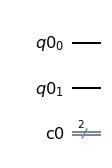

In [4]:
qc.draw(output='mpl') # mostra o circuito

In [5]:
# adiciona a porta lógica de Hadamard ao circuito, aplicada no qubit (registro quântico) 0
qc.h(qr[0]); # tem que usar ; pra não dar aviso

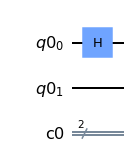

In [6]:
qc.draw(output = 'mpl') # o output = 'mpl' é para a figura ficar mais apresentável

In [7]:
# adiciona uma controll-not ao circuito, com o controle sendo qr[0] e o target sendo qr[1]
qc.cx(qr[0],qr[1]);

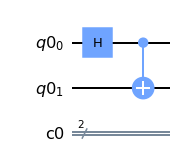

In [8]:
# é importante sempre mandar mostrar o circuito, pra ter certeza que é realmente o que queremos construir
qc.draw(output = 'mpl')

In [9]:
# adiciona medidas em todos os qubits (a ser usada quando queremos acessar a distribuições de probabilidades)
qc.measure(qr,cr);

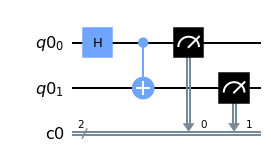

In [10]:
qc.draw(output = 'mpl')

### No simulador

In [11]:
# Determina o backend a ser usado, que poder ser um simulador ou um chip real
# Neste caso escolhemos o simulador qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

In [12]:
# número de medidas para estimativa de uma distribuição de probabilidades
nshots = 8192

In [13]:
# executa o circuito qc no backend escolhido
result = execute(qc, backend = simulator, shots = nshots).result()

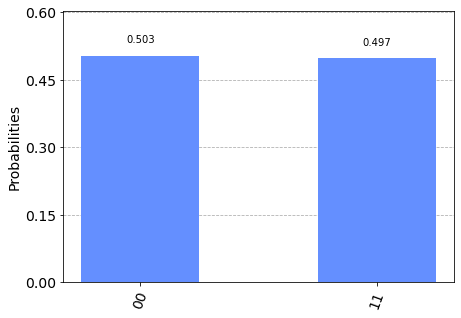

In [14]:
# para visualizar o histograma da distribuicao de probabilidades
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

##### Sobre a função get_counts

In [18]:
counts = result.get_counts(qc); counts, counts['00']

({'11': 4073, '00': 4119}, 4119)

### No chip

In [80]:
# carrega minha conta no IBMQ (o ID foi incluido no outro arquivo, nao precisa incluir aqui)
qiskit.IBMQ.load_account();

ibmqfactory.load_account:WARNING:2021-10-28 14:38:51,354: Credentials are already in use. The existing account in the session will be replaced.


In [81]:
#provider = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')

In [82]:
# determina em qual backend vamos executar o circuito
device = provider.get_backend('ibmq_casablanca')

In [83]:
# se certifica que o backend esta certo
device.name()

'ibmq_casablanca'

In [84]:
# executa o circuito quantico qc no CQ escolhido
job = execute(qc, backend = device, shots = nshots)

In [85]:
from qiskit.tools.monitor import job_monitor

In [86]:
# para monitorar a execucao do circuito
job_monitor(job)

Job Status: job has successfully run


In [87]:
result = job.result()

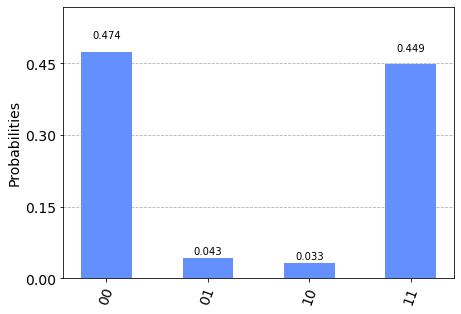

In [88]:
plot_histogram(result.get_counts(qc))